In [1]:
import numpy
import pandas
import math
import matplotlib
import seaborn

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [4]:
auto = pandas.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


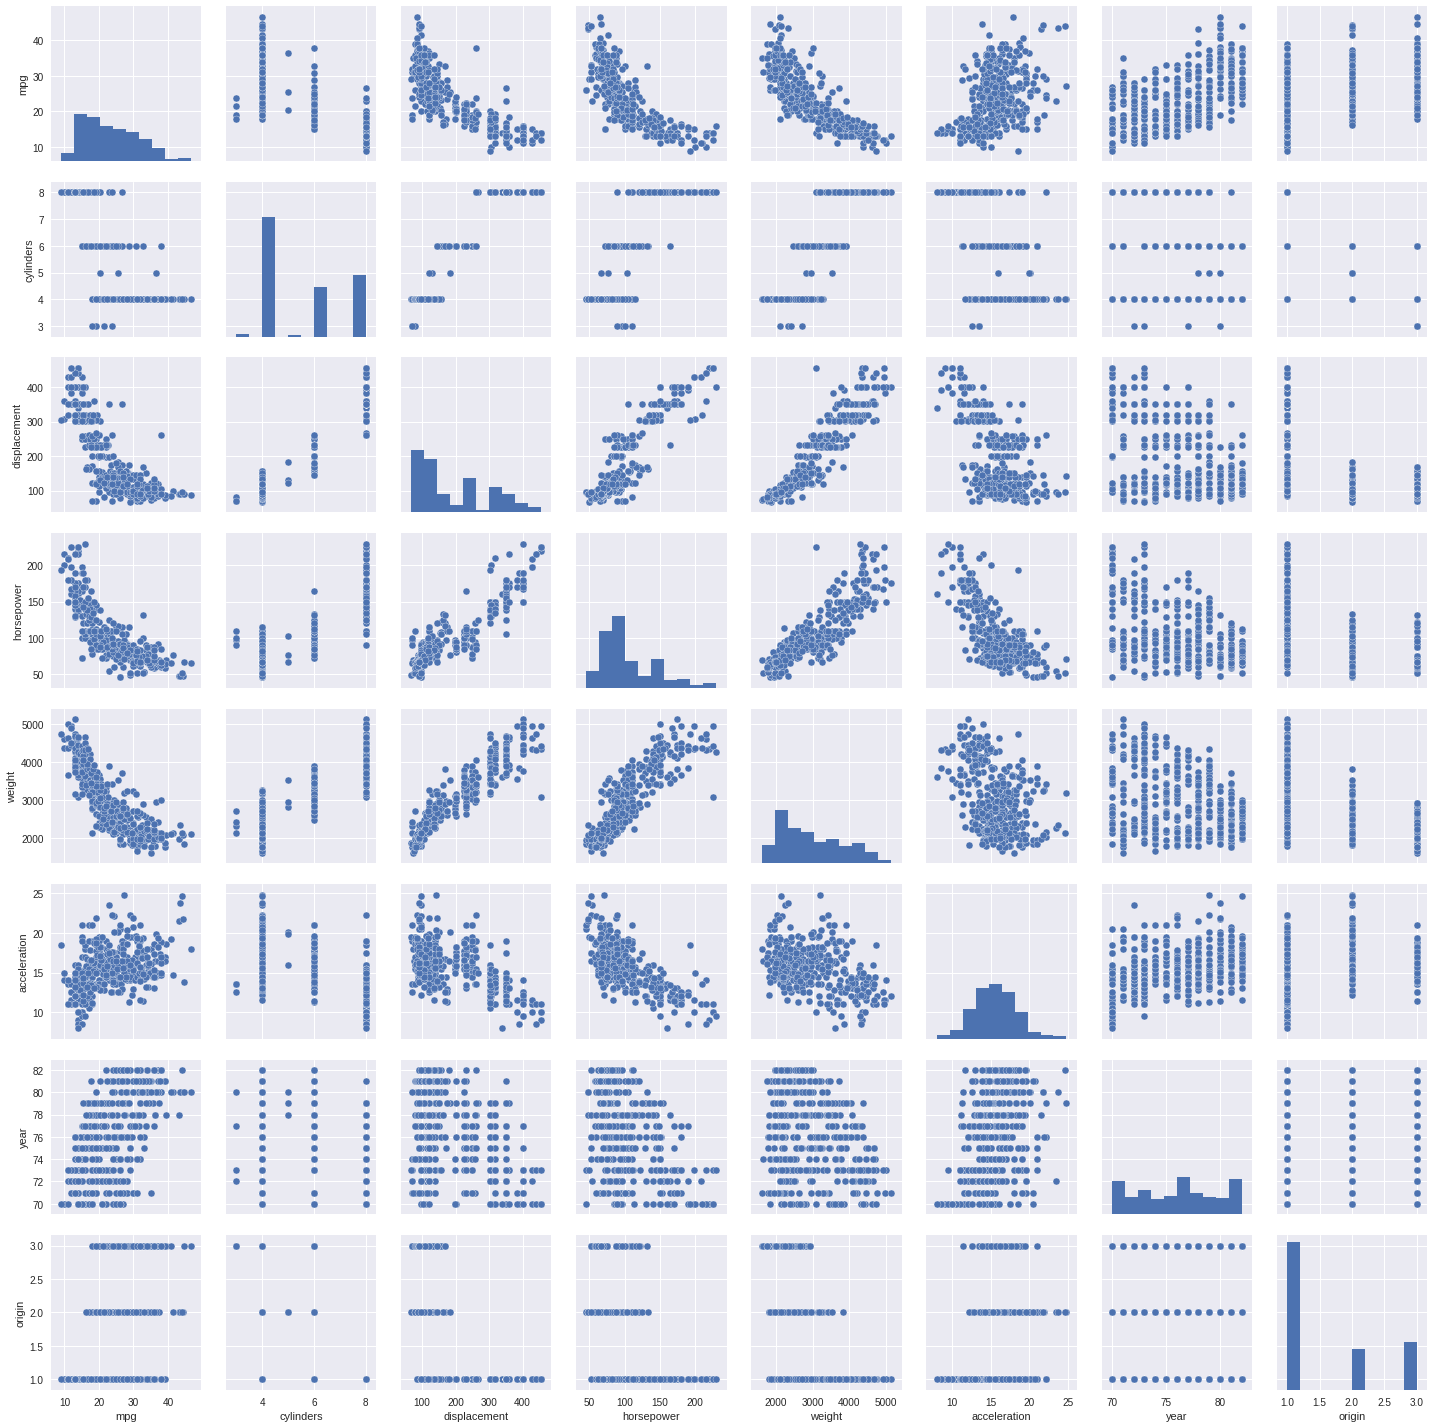

In [10]:
seaborn.pairplot(auto.iloc[:, 0:8])

In [13]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [14]:
fit0 = smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin',data = auto).fit()
print(fit0.summary())

# Judging by the small p-value associated with the F-statistic of the model, we can see that the mpg has a 
# relationship with the predictors. Judging by all of the beta coefficient p-values, the significant predictors
# are displacement, weight, year, and origin. As the engine displacement increases, so do miles per gallon. As 
# the vehicle weight increases, it seems that miles per gallon decrease. The newer the model, or in other words the
# higher the year, the more miles per gallon the vehicle outputs.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 29 Sep 2017   Prob (F-statistic):          2.04e-139
Time:                        19:43:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

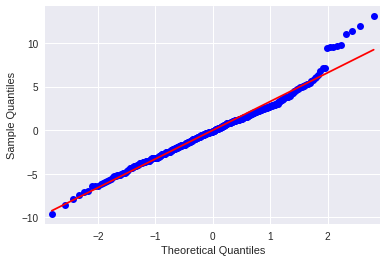

In [15]:
sm.qqplot(fit0.resid,line = 's');

# It seems from the plot that the residuals are approximately normally distributed (because the points all lie close 
# to the 45 degree line). However, there does seem to be some outliers based on the points towards the upper right 
# corner that lie far from the 45 degree line.

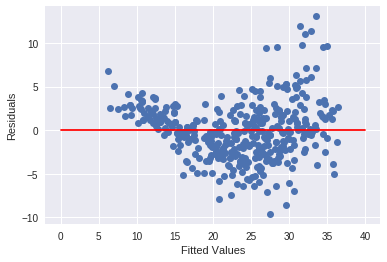

In [20]:
#Plotting residual plot
matplotlib.pyplot.plot(fit0.fittedvalues,fit0.resid,'o')
matplotlib.pyplot.plot([0,40],[0,0],'r') #Plots straight line
matplotlib.pyplot.xlabel('Fitted Values')
matplotlib.pyplot.ylabel('Residuals')

# From the residuals plot, we can see that there are some non-linearities in the model. There also appears to be 
# outliers in this plot (the points far away from the y = 0 line in the range x = [30, 35]).

In [21]:
# To study interactions, we must go to the correlation matrix and pick the 2 pairs of most highly correlated 
# predictors: displacement and cylinders, and displacement and weight.
fit1 = smf.ols('mpg~cylinders+displacement+weight+displacement*cylinders+displacement*weight',data = auto).fit()
print(fit1.summary())

# From the summary of the fit, we see that the coefficient corresponding to the interaction of displacement and weight
# has a low p-value (<<0.05) so the interaction between displacement and weight is statistically significant. However, 
# since the p-value associated with coefficient of the interaction of displacement and cylinders is high (0.384>0.05),
# the interaction between cylinders and displacement is statistically insignificant.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     205.8
Date:                Fri, 29 Sep 2017   Prob (F-statistic):          1.63e-106
Time:                        20:22:08   Log-Likelihood:                -1106.6
No. Observations:                 392   AIC:                             2225.
Df Residuals:                     386   BIC:                             2249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 52

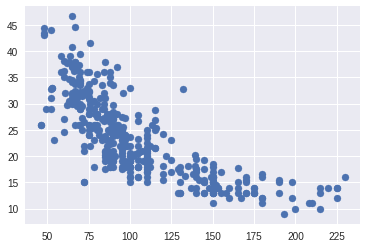

In [28]:
# For the transformations, I decided to use one predictor horsepower, and transform in the three methods mentioned in 
# the homework question.
matplotlib.pyplot.scatter(auto['horsepower'], auto['mpg'])

In [36]:
auto['horsepower2'] = auto['horsepower']*auto['horsepower']
auto['loghorsepower'] = [math.log(i) for i in auto['horsepower']]
auto['sqrthorsepower'] = [math.sqrt(i) for i in auto['horsepower']]
auto.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,loghorsepower,sqrthorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392.000000,392.000000,392.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN,12391.642857,4.587931,10.063940
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN,9813.755056,0.343379,1.787357
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN,2116.000000,3.828641,6.782330
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN,5625.000000,4.317488,8.660254
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN,8742.500000,4.537947,9.669505
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN,15879.000000,4.836188,11.224709


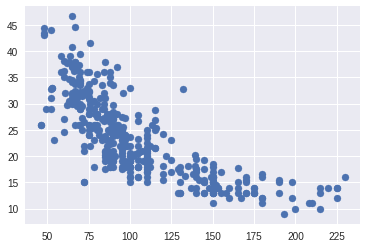

In [50]:
matplotlib.pyplot.scatter(auto['horsepower'], auto['mpg'])

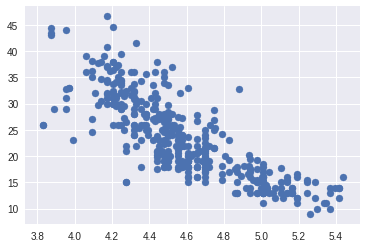

In [33]:
matplotlib.pyplot.scatter(auto['loghorsepower'], auto['mpg'])

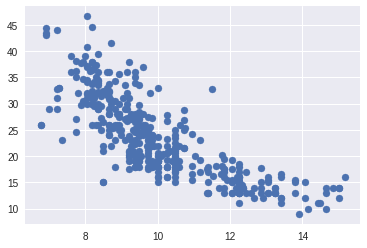

In [35]:
matplotlib.pyplot.scatter(auto['sqrthorsepower'], auto['mpg'])

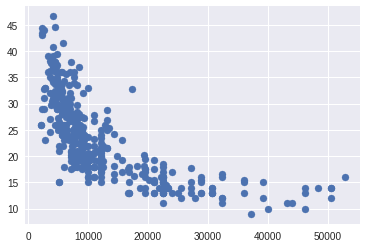

In [37]:
matplotlib.pyplot.scatter(auto['horsepower2'], auto['mpg'])

In [ ]:
# From the three plots above, the transformation that yields the most linear relationship between horsepower and mpg 
# is the log transformation.

In [38]:
fit2 = smf.ols('mpg~horsepower2',data = auto).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           6.23e-62
Time:                        23:13:49   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.4658      0.447     68.219      

In [44]:
fitsqrt = smf.ols('mpg~sqrthorsepower',data = auto).fit()
print(fitsqrt.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           2.02e-89
Time:                        23:17:27   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         58.7052      1.349     43.

In [41]:
fitlog = smf.ols('mpg~loghorsepower',data = auto).fit()
print(fitlog.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           1.70e-95
Time:                        23:15:22   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       108.6997      3.050     35.644

In [ ]:
# From the summaries of the three fits above, all of the beta 1 coefficients seem statistically significant.

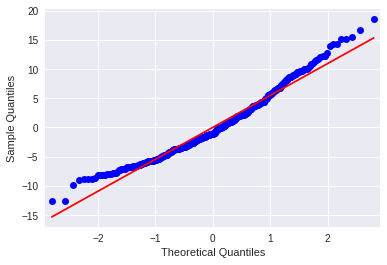

In [42]:
# Q-Q plot for model with horsepower^2
sm.qqplot(fit2.resid,line = 's');

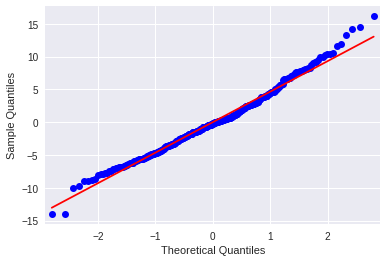

In [45]:
# Q-Q plot for model with sqrt(horsepower)
sm.qqplot(fitsqrt.resid,line = 's');

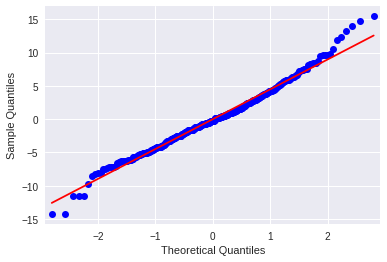

In [46]:
# Q-Q plot for model with log(horsepower)
sm.qqplot(fitlog.resid,line = 's');

In [ ]:
# The residuals seem to be approximately normally distributed in all three models

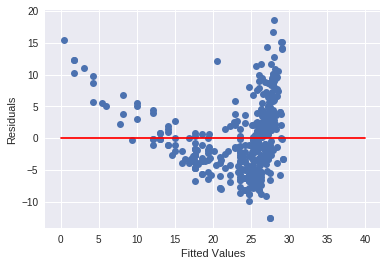

In [47]:
# Plotting residual plot for horsepower^2
matplotlib.pyplot.plot(fit2.fittedvalues,fit2.resid,'o')
matplotlib.pyplot.plot([0,40],[0,0],'r')
matplotlib.pyplot.xlabel('Fitted Values')
matplotlib.pyplot.ylabel('Residuals')

# From the plot, we can see huge non-linearities in the model.

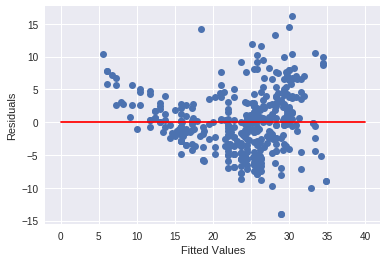

In [48]:
# Plotting residual plot for sqrt(horsepower)
matplotlib.pyplot.plot(fitsqrt.fittedvalues,fitsqrt.resid,'o')
matplotlib.pyplot.plot([0,40],[0,0],'r')
matplotlib.pyplot.xlabel('Fitted Values')
matplotlib.pyplot.ylabel('Residuals')

# From the plot, we can see that although there are non-linearities in this model, it performs better than the previous
# model.

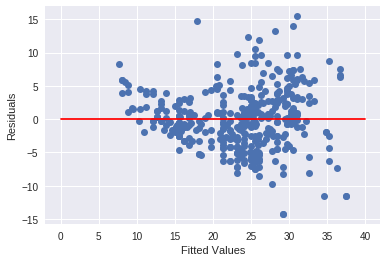

In [49]:
# Plotting residual plot for log(horsepower)
matplotlib.pyplot.plot(fitlog.fittedvalues,fitlog.resid,'o')
matplotlib.pyplot.plot([0,40],[0,0],'r')
matplotlib.pyplot.xlabel('Fitted Values')
matplotlib.pyplot.ylabel('Residuals')

# From the plot, we can see that this transformation yields the least non-linearities.